In [1]:
import torch

In [15]:
# These are the inputs to the attention mechanism, which represents the respectve vectors of each word in the sequence.
inputs = torch.tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]])

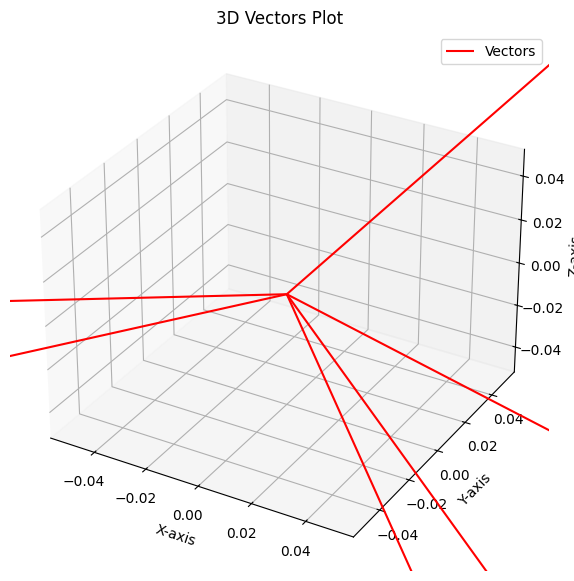

In [3]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting x, y, z coordinates
x = inputs[:, 0].numpy()
y = inputs[:, 1].numpy()
z = inputs[:, 2].numpy()

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the vectors
ax.quiver(0, 0, 0, x, y, z, color='r', label='Vectors', arrow_length_ratio=0.1)

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set title and legend
ax.set_title('3D Vectors Plot')
ax.legend()

# Show plot
plt.show()

In [4]:
query = inputs[1]
attention_scores_2 = torch.empty(inputs.shape[0])
for i, vec in enumerate(inputs):
    attention_scores_2[i] = torch.dot(query, vec)

print(attention_scores_2)


tensor([-0.1913,  5.0345,  0.6437, -0.3340, -1.3706, -5.6814])


In [5]:
attention_weights_2 = attention_scores_2 / attention_scores_2.sum()
print("Attention weights for query 2: ", attention_weights_2)
print("Sum of attention weights for query 2: ", attention_weights_2.sum())

Attention weights for query 2:  tensor([ 0.1007, -2.6512, -0.3390,  0.1759,  0.7218,  2.9918])
Sum of attention weights for query 2:  tensor(1.0000)


In [6]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attention_weights_2 = softmax(attention_scores_2)
print("Attention weights for query 2: ", attention_weights_2)
print("Sum of attention weights for query 2: ", attention_weights_2.sum())


Attention weights for query 2:  tensor([5.2494e-03, 9.7646e-01, 1.2100e-02, 4.5514e-03, 1.6142e-03, 2.1667e-05])
Sum of attention weights for query 2:  tensor(1.0000)


In [7]:
attention_weights_2 = torch.softmax(attention_scores_2, dim=0)
print("Attention weights for query 2: ", attention_weights_2)
print("Sum of attention weights for query 2: ", attention_weights_2.sum())

Attention weights for query 2:  tensor([5.2494e-03, 9.7646e-01, 1.2100e-02, 4.5514e-03, 1.6142e-03, 2.1667e-05])
Sum of attention weights for query 2:  tensor(1.)


In [8]:
context_vector_2 = torch.zeros(query.shape)
for i, vec in enumerate(inputs):
    context_vector_2 += attention_weights_2[i] * vec

print("Context vector for query 2:", context_vector_2)

Context vector for query 2: tensor([0.9096, 1.5453, 1.2613])


In [9]:
all_attention_scores = torch.empty(inputs.shape[0], inputs.shape[0])
for i, query in enumerate(inputs):
    for j, vec in enumerate(inputs):
        all_attention_scores[i, j] = torch.dot(query, vec)

print("All attention scores:", all_attention_scores)

All attention scores: tensor([[ 0.1740, -0.1913,  0.4932, -0.1133, -0.3422, -0.5804],
        [-0.1913,  5.0345,  0.6437, -0.3340, -1.3706, -5.6814],
        [ 0.4932,  0.6437,  1.6926, -0.5219, -1.4420, -3.2377],
        [-0.1133, -0.3340, -0.5219,  2.4137,  1.5050,  1.9999],
        [-0.3422, -1.3706, -1.4420,  1.5050,  1.8478,  3.9260],
        [-0.5804, -5.6814, -3.2377,  1.9999,  3.9260, 10.6686]])


In [10]:
all_attention_scores = inputs @ inputs.T
print("All attention scores:", all_attention_scores)

All attention scores: tensor([[ 0.1740, -0.1913,  0.4932, -0.1133, -0.3422, -0.5804],
        [-0.1913,  5.0345,  0.6437, -0.3340, -1.3706, -5.6814],
        [ 0.4932,  0.6437,  1.6926, -0.5219, -1.4420, -3.2377],
        [-0.1133, -0.3340, -0.5219,  2.4137,  1.5050,  1.9999],
        [-0.3422, -1.3706, -1.4420,  1.5050,  1.8478,  3.9260],
        [-0.5804, -5.6814, -3.2377,  1.9999,  3.9260, 10.6686]])


In [11]:
all_attention_scores = torch.matmul(inputs, inputs.T)
print("All attention scores:", all_attention_scores)

All attention scores: tensor([[ 0.1740, -0.1913,  0.4932, -0.1133, -0.3422, -0.5804],
        [-0.1913,  5.0345,  0.6437, -0.3340, -1.3706, -5.6814],
        [ 0.4932,  0.6437,  1.6926, -0.5219, -1.4420, -3.2377],
        [-0.1133, -0.3340, -0.5219,  2.4137,  1.5050,  1.9999],
        [-0.3422, -1.3706, -1.4420,  1.5050,  1.8478,  3.9260],
        [-0.5804, -5.6814, -3.2377,  1.9999,  3.9260, 10.6686]])


In [12]:
all_attention_weights = torch.softmax(all_attention_scores, dim=-1)
print("All attention weights:", all_attention_weights)
print("Sum of all attention weights:", all_attention_weights.sum(dim=-1))

All attention weights: tensor([[2.0461e-01, 1.4200e-01, 2.8154e-01, 1.5352e-01, 1.2211e-01, 9.6223e-02],
        [5.2494e-03, 9.7646e-01, 1.2100e-02, 4.5514e-03, 1.6142e-03, 2.1667e-05],
        [1.6635e-01, 1.9338e-01, 5.5198e-01, 6.0279e-02, 2.4022e-02, 3.9877e-03],
        [3.5334e-02, 2.8337e-02, 2.3482e-02, 4.4222e-01, 1.7824e-01, 2.9239e-01],
        [1.1318e-02, 4.0470e-03, 3.7683e-03, 7.1774e-02, 1.0113e-01, 8.0797e-01],
        [1.3002e-05, 7.9193e-08, 9.1192e-07, 1.7165e-04, 1.1779e-03, 9.9864e-01]])
Sum of all attention weights: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [13]:
all_context_vectors = all_attention_weights @ inputs
print("All context vectors :", all_context_vectors)

All context vectors : tensor([[ 0.0820,  0.2441, -0.2841],
        [ 0.9096,  1.5453,  1.2613],
        [ 0.8742,  0.2282,  0.0448],
        [-1.1466,  0.2898, -1.0053],
        [-2.4283, -0.5283, -1.2824],
        [-2.8376, -0.7833, -1.4086]])


In [14]:
all_context_vectors = torch.matmul(all_attention_weights, inputs)
print("All context vectors :", all_context_vectors)

All context vectors : tensor([[ 0.0820,  0.2441, -0.2841],
        [ 0.9096,  1.5453,  1.2613],
        [ 0.8742,  0.2282,  0.0448],
        [-1.1466,  0.2898, -1.0053],
        [-2.4283, -0.5283, -1.2824],
        [-2.8376, -0.7833, -1.4086]])
